<a href="https://colab.research.google.com/github/aviralsingh2907/PlayStore-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Exploratory Data Analysis</u> - <u>Play Store App Review Analysis</u></b>

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member**     - Aviral Singh

# <b><u>Project Summary</u>:</b>

# **<u>GitHub Link</u>:**

# <b><u>Problem Statement</u>:</b>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.

# <b><u>Dataset Import</u>:</b>

In [3]:
# Importing package:

import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the datasets:

playstore_df_main = pd.read_csv('/content/drive/MyDrive/Portfolio Project/EDA - Play Store App Review/Play Store Data.csv')
user_review_df_main = pd.read_csv('/content/drive/MyDrive/Portfolio Project/EDA - Play Store App Review/User Reviews.csv')

In [5]:
# Creating copies:

playstore_df = playstore_df_main.copy()
user_review_df = user_review_df_main.copy()

In [6]:
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
user_review_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
# Checking dataset information:

playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
# Null values check:

playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
user_review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

# <b><u>Data Cleaning (Play Store Dataset)</u>:</b>

Cleaning raw data before processing & analysis:

* Determining which parts of the data are incomplete, incorrect, inaccurate or irrelevant.
* Replacing, changing, or deleting the soiled or coarse data.

Creating a function to obtain necessary information about various dataset attributes.

The function can be recalled & reused in the future.

In [12]:
# Defining the function:

def necessary_info():
    null = pd.DataFrame(index = playstore_df.columns)
    null['data_type'] = playstore_df.dtypes
    null['null_count'] = playstore_df.isnull().sum()
    null['unique_count'] = playstore_df.nunique()
    return null

In [13]:
# Calling the function:

necessary_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### <b><u>'App' column</u>:</b>

Checking for duplicate values in the 'App' column.

In [14]:
print("No. of Unique App names = ", len(playstore_df['App'].unique()))
print("Total no. of App names = ", playstore_df.shape[0])
print("Duplicate App names = ", len(playstore_df['App']) - len(playstore_df['App'].unique()))

No. of Unique App names =  9660
Total no. of App names =  10841
Duplicate App names =  1181


In [15]:
# Looking for occurence of duplicate values:

playstore_df[playstore_df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [16]:
playstore_df.drop_duplicates(subset='App', keep='first', inplace=True)

### <b><u>'Type' column</u>:</b>

In [17]:
# Unique set of values in 'Type' column:

playstore_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

0 & null values found.

Replacing them by 'Free'.

In [18]:
playstore_df['Type'].replace(to_replace=['0'], value=['Free'], inplace=True)
playstore_df['Type'].fillna('Free', inplace=True)

### <b><u>'Content Rating' column</u>:</b>

In [19]:
# Checking for null values:

playstore_df[playstore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# Data comparison with adjacent rows:

playstore_df.loc[10465:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<u>Observations</u>:

* Wrong data entry in row 10472.
* All of the column values found to be replaced by their previous columns' values due to a missing value in the category column.

In [21]:
# Dropping the rows containing null values in 'Content Rating' column:

playstore_df.dropna(subset=['Content Rating'], inplace=True)

### <b><u>'Rating' column</u>:</b>

* 'Rating' column has a total of 1463 missing values.
* Replacing the missing values with the Mode value of the column.

In [23]:
# Finding the mode value:

mode_rating = playstore_df['Rating'].mode()
print(f'The mode value of Rating column is: {mode_rating[0]}')

# Replacing the null values:

playstore_df['Rating'].fillna(value=mode_rating[0], inplace = True)
necessary_info()

The mode value of Rating column is: 4.3


,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


### <b><u>Deleting Unnecessary Columns</u>:</b>

In [24]:
# Deleting unnecessary columns:

playstore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [25]:
necessary_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


* The null counts for all necessary columns are zero.
* There are no more missing values in the data frame.

# <b><u>Data Preparation (Play Store Dataset)</u>:</b>

* Verifying the data type for 'Reviews', 'Size', 'Installs' & 'Price' columns.
* They should ideally be 'int' or 'float'.
* Making appropriate changes if not the case.

### <b><u>'Reviews' column</u>:</b>

In [26]:
# Converting 'Reviews' data type to 'int':

playstore_df['Reviews'] = playstore_df.Reviews.astype(int)

### <b><u>'Size' column</u>:</b>

* String values like 'Varies with device', 'M' & 'k' present in 'Size' column.
* Converting KBs to MBs. Removing non-numeric values. Converting to 'int' or 'float'.

In [27]:
# Removing '+' :

playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.strip('+'))

In [28]:
# Removing ',' :

playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.replace(',', ''))

In [29]:
# Removing 'M' & 'k', and converting KBs into MBs:

playstore_df['Size'] = playstore_df['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else x)

In [30]:
# Replacing 'Varies with device' by Nan:

playstore_df['Size'] = playstore_df.Size.replace('Varies with device', np.NaN)

* Null values need to be taken care of.
* Some apps' sizes will be too huge and others excessively small, i.e., too much variation in the apps' sizes.
* It's best to remove the rows containing Null value instead of replacing them with mean or mode.

In [31]:
# Removing rows containing Null (earlier 'Varies with device') value in 'Size' column:

playstore_df.dropna(subset=['Size'], inplace=True)

In [32]:
# Renaming the column:

playstore_df.rename(columns={'Size': 'Size(in MB)'}, inplace=True)

In [33]:
# Converting 'Size' datatype to numeric:

playstore_df['Size(in MB)'] = pd.to_numeric(playstore_df['Size(in MB)'])

### <b><u>'Installs' column</u>:</b>

In [34]:
# Checking for unique values:

playstore_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

* " , " needs to be replaced.
* " + " needs to be removed.
* Datatype needs to be changed to 'float'.

In [35]:
# Removing  '+' :

playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: x.strip('+'))

# Replacing ',' :

playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: x.replace(',', ''))

In [36]:
# Converting datatype to numeric:

playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'])

### <b><u>'Price' column</u>:</b>

In [37]:
# Checking for value count:

playstore_df['Price'].value_counts()

0          7747
$0.99       142
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [38]:
# Removing "$" :

playstore_df['Price'] = playstore_df.Price.apply(lambda x: x.strip('$'))

In [39]:
# Converting datatype to numeric:

playstore_df['Price'] = pd.to_numeric(playstore_df['Price'])

## <b><u>Final look at the DataFrame</u>:</b>

In [40]:
# Calling the function:

necessary_info()

,data_type,null_count,unique_count
App,object,0,8432
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4304
Size(in MB),float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,115


In [41]:
playstore_df.shape

(8432, 10)

* Dataset cleaned. Unnecessary rows & columns containing Null values & garbage data removed.
* 10 columns & 8434 rows in the final data frame.

## <b><u>Dataset summary based on</u>:</b>

* Total size occupied by each app category.
* Average rating for each app category.
* Total installs for each app category.
* Total reviews for each app category.

In [42]:
categorical_summary = playstore_df.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum','Reviews':'sum'})
categorical_summary

,Size(in MB),Rating,Installs,Reviews
Category,,,,
ART_AND_DESIGN,767.000000,4.358065,99338100,1087343
AUTO_AND_VEHICLES,1502.760547,4.172000,43770211,992322
BEAUTY,648.400000,4.293617,13696950,186856
BOOKS_AND_REFERENCE,2548.007031,4.316495,114962076,3262900
BUSINESS,5213.950977,4.179787,386428560,4391145
COMICS,675.928320,4.173469,17481150,614606
COMMUNICATION,2736.126172,4.126446,1817943051,45902247
DATING,2490.117578,4.042138,84606107,2197285
EDUCATION,1696.056641,4.373034,157302000,4173948


# <b><u>Data Analysis & Visualization (Play Store Dataset)</u>:</b>

### <b><u>'Category' wise Analysis</u>:</b>

In [45]:
# Unique categories:

len(playstore_df['Category'].unique())

33

* 33 unique app categories in this dataset.
* Figuring out category wise app counts.

In [46]:
# Determining top categories with highest app counts:

x = playstore_df['Category'].value_counts().index
y = playstore_df['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

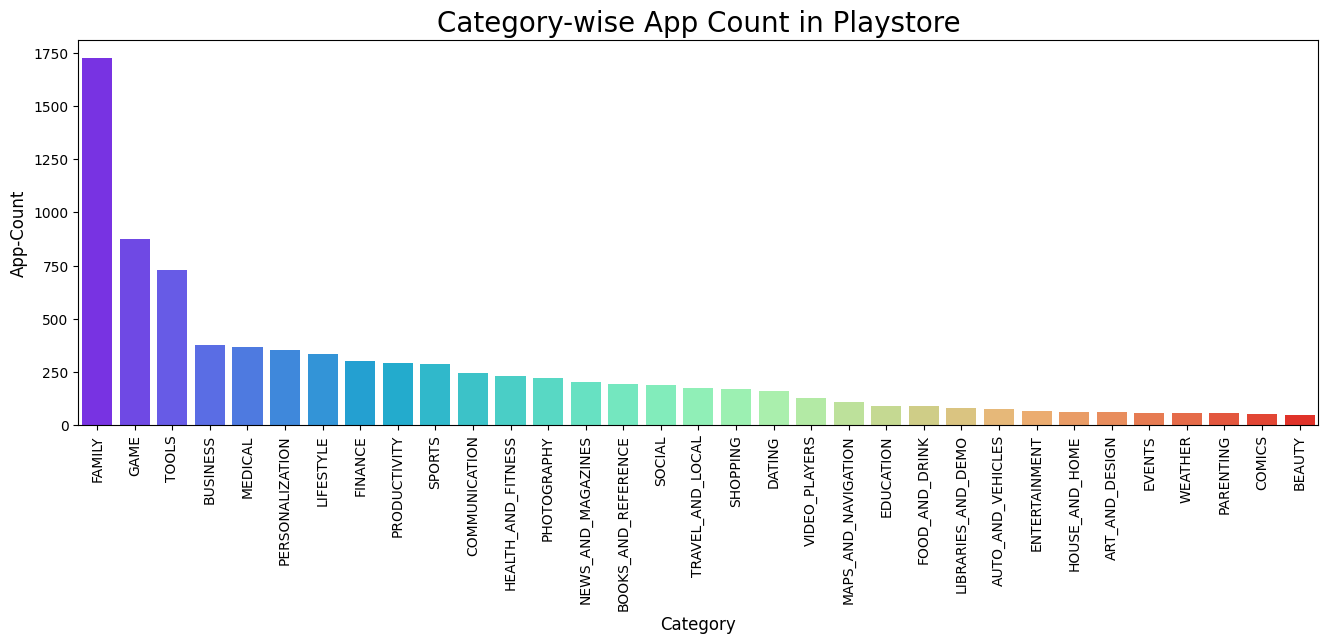

In [50]:
# Plotting graph for the same:

plt.figure(figsize=(16,5))
plt.xlabel("Category", fontsize = 12)
plt.ylabel("App-Count", fontsize = 12)
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Category-wise App Count in Playstore", fontsize = 20);

<b><u>Observations</u>:</b>
* 33 app categories in the dataset.
* 'Family' category has the most amount of apps, followed by 'Game' category.
* 'Beauty' category has the least amount of apps, followed by 'Comics' category.

In [51]:
# App-Count wise Top 10 categories:

Top10_categories = playstore_df['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'}, inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1726
1,GAME,873
2,TOOLS,731
3,BUSINESS,376
4,MEDICAL,368
5,PERSONALIZATION,351
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


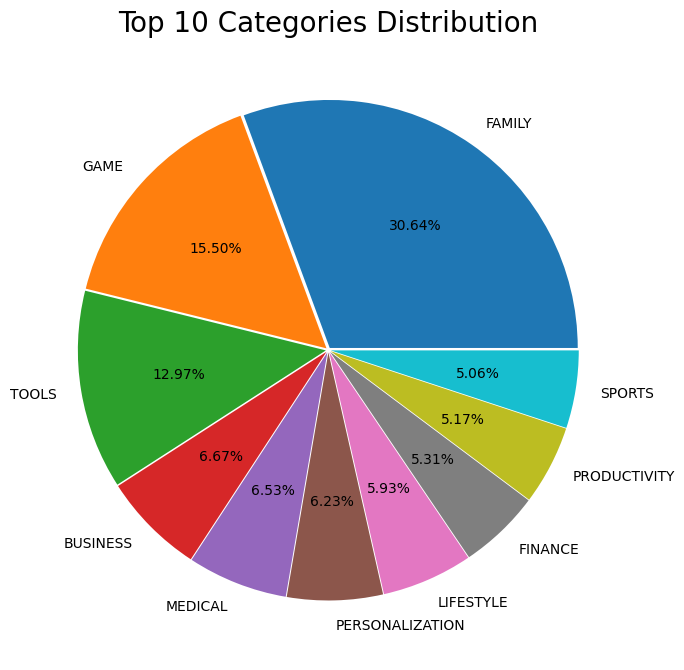

In [56]:
# Plotting Distribution:

plt.figure(figsize=(8,9))
plt.pie(Top10_categories['Count'], labels=Top10_categories['Category'], autopct='%.2f%%', explode=[0.01]*10)
plt.title('Top 10 Categories Distribution', fontsize=20)
plt.show()

<b><u>Observations</u>:</b>
* Family (31%), Games (15%) And Tools (13%) categories contribute the most to the Top 10 Categories by App-Count.

### <b><u>'Rating' wise Analysis</u>:</b>

<Figure size 1400x1000 with 0 Axes>

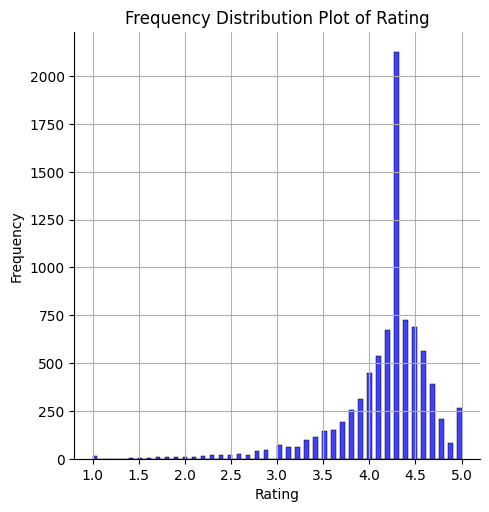

In [61]:
# Ploting Frequency Distribution graph for 'Rating':

plt.figure(figsize=(14,10))
sns.displot(playstore_df['Rating'], color ='blue')
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Frequency Distribution Plot of Rating')
plt.show()

In [62]:
# Calculating the Average Rating:

print('The overall average rating in the playstore is :', playstore_df['Rating'].mean())

The overall average rating in the playstore is : 4.18384724857685


<b><u>Observations</u>:</b>
* Most apps in playstore have been rated 4 or more.
* It can be infered that most apps have managed to satisfy the users.

In [73]:
# App-Count of 5-Star Rated Apps:

five_star_rated_apps = playstore_df[playstore_df['Rating']==5]
five_star_rated_apps['App'].nunique()
print(f"The total no. of 5-star rated Apps is: {five_star_rated_apps['App'].nunique()}")

The total no. of 5-star rated Apps is: 266


In [75]:
# Top 10 Categories with most 5-Star Rated Apps:

top10_5StarApp_categories = five_star_rated_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)
top10_5StarApp_categories

,Category,Count
0,FAMILY,65
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


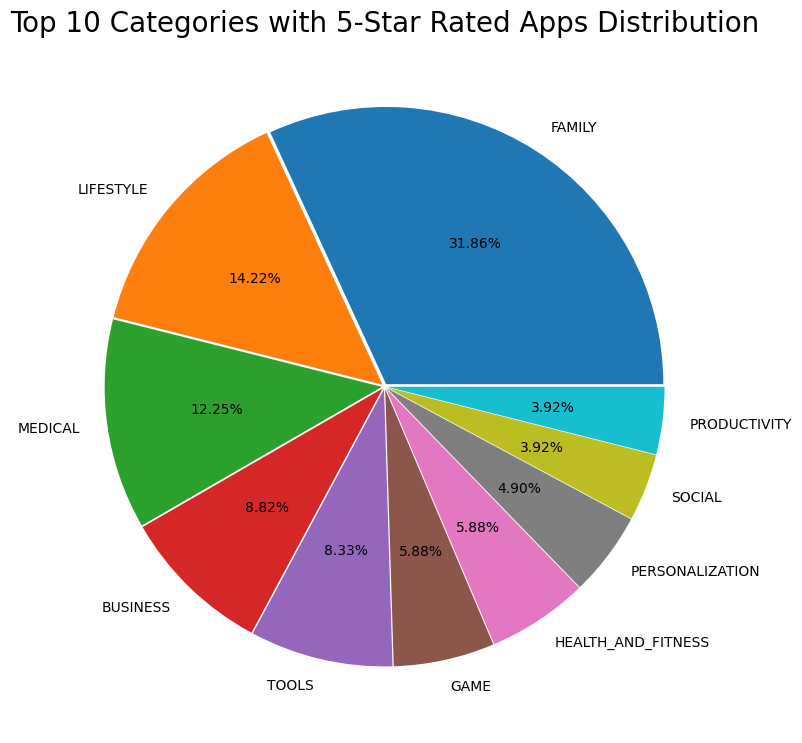

In [78]:
# Plotting Distribution:

plt.figure(figsize=(9,9))
plt.pie(top10_5StarApp_categories['Count'], labels=top10_5StarApp_categories['Category'], autopct='%.2f%%', explode=[0.01]*10)
plt.title('Top 10 Categories with 5-Star Rated Apps Distribution', fontsize=20)
plt.show()

<b><u>Observations</u>:</b>
* Family category has the most 5-star rated apps, followed by Lifestyle & Medical.
* The top 3 categories make the most of the Top 10 Categories with most 5-star rated apps.

### <b><u>'Content Rating' wise Analysis</u>:</b>

Let us see, which category of Apps from the ‘Content Rating’ column is found more on the play store.

In [84]:
# Content rating value counts:

value_c = playstore_df["Content Rating"].value_counts().reset_index().rename(columns={'index':'Content Rating','Content Rating':'Count'})
value_c

,Content Rating,Count
0,Everyone,6917
1,Teen,898
2,Mature 17+,340
3,Everyone 10+,273
4,Adults only 18+,2
5,Unrated,2


Text(0, 0.5, 'No. of Apps')

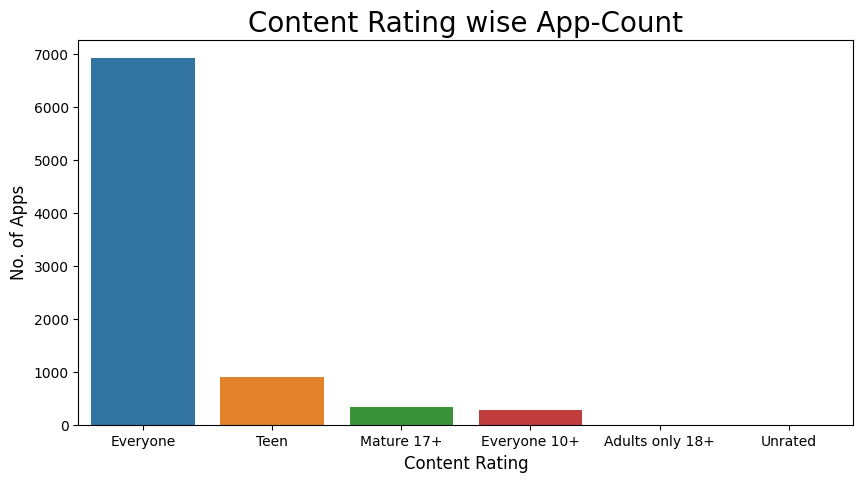

In [94]:
# Plotting Content Rating wise App-Count:

plt.figure(figsize=(10,5))
sns.barplot(x="Content Rating", y="Count", data=value_c)
plt.title("Content Rating wise App-Count", fontsize=20)
plt.xlabel("Content Rating", fontsize=12)
plt.ylabel("No. of Apps", fontsize=12)

<b><u>Observations</u>:</b>
* 'Everyone' Content Rating has the most amount of apps by a really big margin.
* 'Adults' & 'Unrated' have negligible amount of apps.

### <b><u>'Free' vs 'Paid' App Analysis</u>:</b>

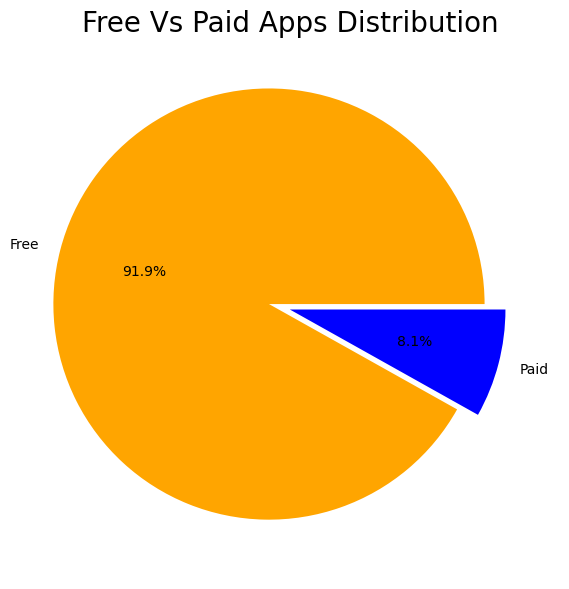

In [97]:
# 'Free' vs 'Paid' Apps Plot:

plt.figure(figsize=(7,7))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["orange","blue"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=0)
plt.title('Free Vs Paid Apps Distribution', size=20)
plt.show()

<b><u>Observations</u>:</b>
* Nearly 92% of the apps are free apps.
* 8% of the apps have to be paid for.

### <b><u>'Installs' wise Analysis</u>:</b>

Let us check, which category App’s have the most number of installs?

In [102]:
# Number of Installs per Category:

num_installs = playstore_df.groupby('Category')['Installs'].agg(np.sum)
num_installs

Category
ART_AND_DESIGN            99338100
AUTO_AND_VEHICLES         43770211
BEAUTY                    13696950
BOOKS_AND_REFERENCE      114962076
BUSINESS                 386428560
COMICS                    17481150
COMMUNICATION           1817943051
DATING                    84606107
EDUCATION                157302000
ENTERTAINMENT            637960000
EVENTS                    10672151
FAMILY                  3552971425
FINANCE                  244623484
FOOD_AND_DRINK           136588740
GAME                   11532464253
HEALTH_AND_FITNESS       756461912
HOUSE_AND_HOME            51612461
LIBRARIES_AND_DEMO        51895910
LIFESTYLE                404600839
MAPS_AND_NAVIGATION      174029890
MEDICAL                   31589617
NEWS_AND_MAGAZINES      1191005650
PARENTING                 23971010
PERSONALIZATION          895179772
PHOTOGRAPHY             1493897655
PRODUCTIVITY            1296312744
SHOPPING                 710748785
SOCIAL                   558264802
SPORTS     

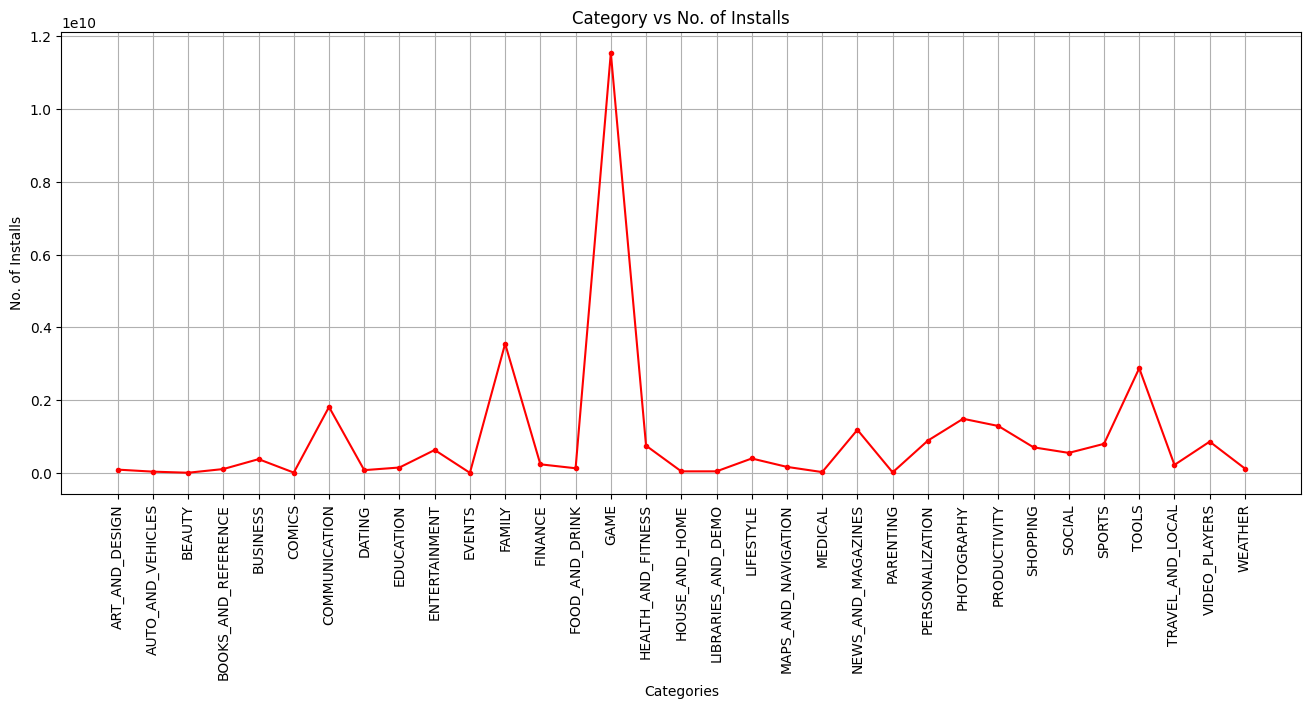

In [104]:
# Category vs No. of Installs Graph Plot:

plt.figure(figsize=(16,6))
plt.plot(num_installs,  color='red', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('No. of Installs')
plt.title('Category vs No. of Installs')
plt.grid()
plt.show()

<b><u>Observations</u>:</b>
* 'Games' category has the maximum no. of installs.
* Followed by 'Family', 'Tools' & 'Communication' categories.

In [113]:
# Top 10 Most Installed Apps in a Category:

def top10installs_category(str):
    str = str.upper()
    top10 = playstore_df[playstore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)

    plt.figure(figsize=(12,7))
    plt.title(f'Top 10 Most Installed Apps in {str} Category', size=20);
    plt.xlabel('App', fontsize=12)
    plt.ylabel('Installs', fontsize=12)
    graph = sns.barplot(x = top10apps.App, y=top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

After we are done with defining the function, it’s time to check and see if everything is working fine. So let’s test it by passing Game category to the above-defined function.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


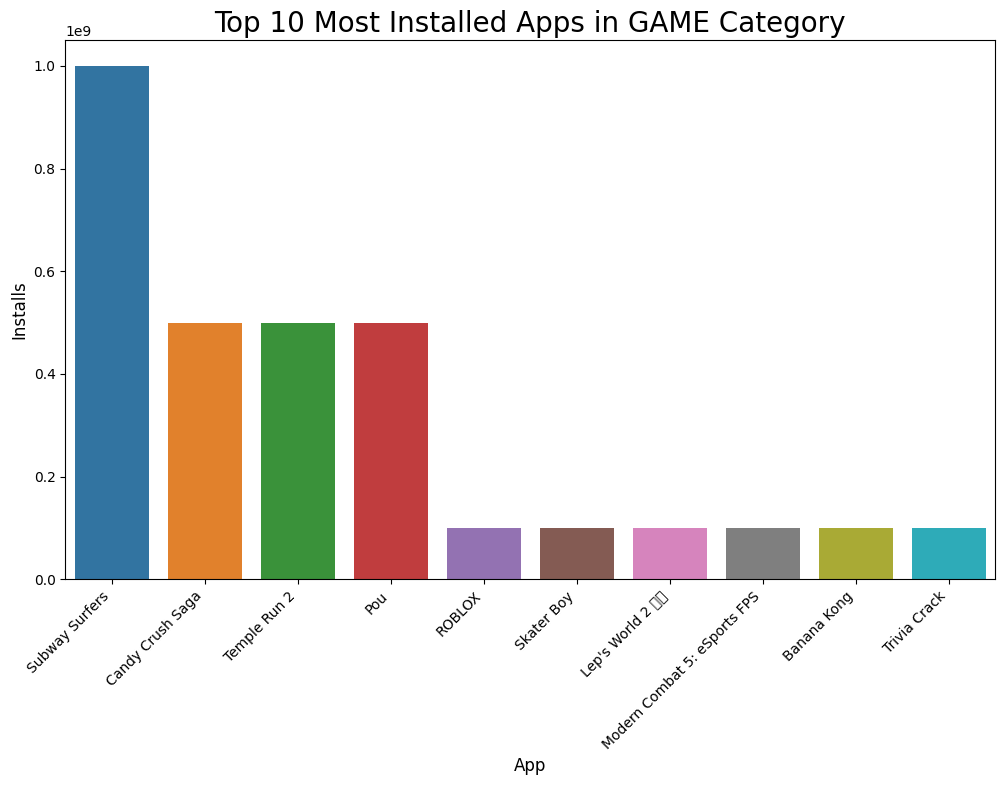

In [114]:
# Calling the function for 'Game' Category:

top10installs_category('Game')

<b><u>Observations</u>:</b>
* Subway Surfers is the most installed app in the Game category, followed by Candy Crush Saga & Temple Run 2.

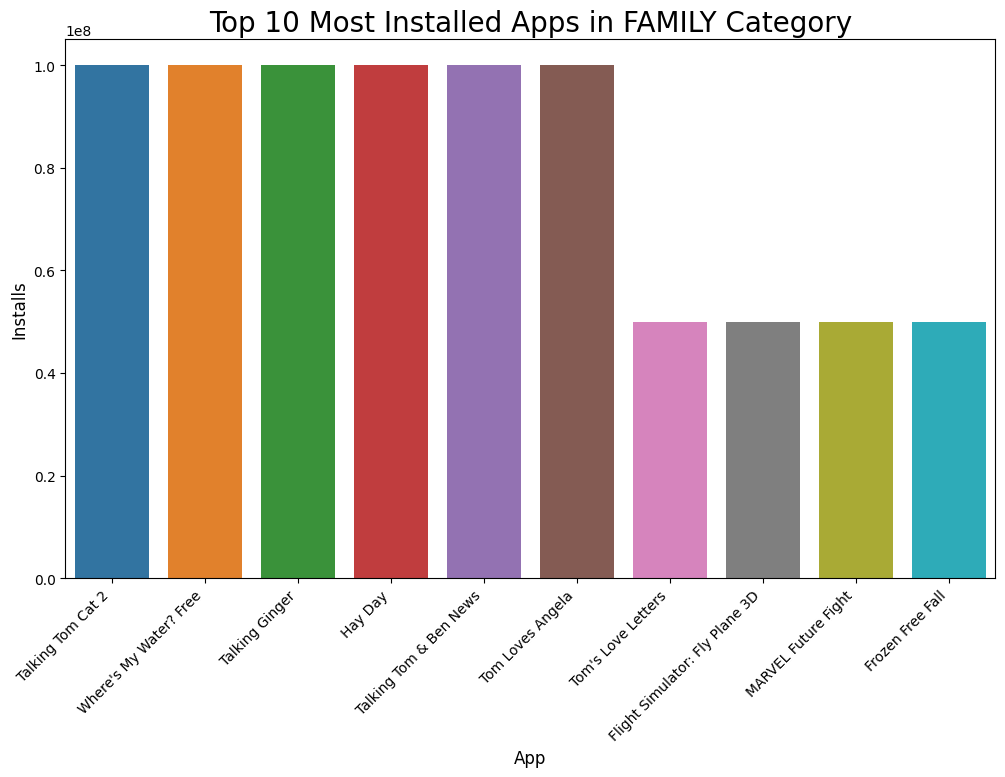

In [115]:
# Calling the function for 'Family' Category:

top10installs_category('Family')

<b><u>Observations</u>:</b>
* Talking Tom Cat 2 is the most installed app in the Family category.

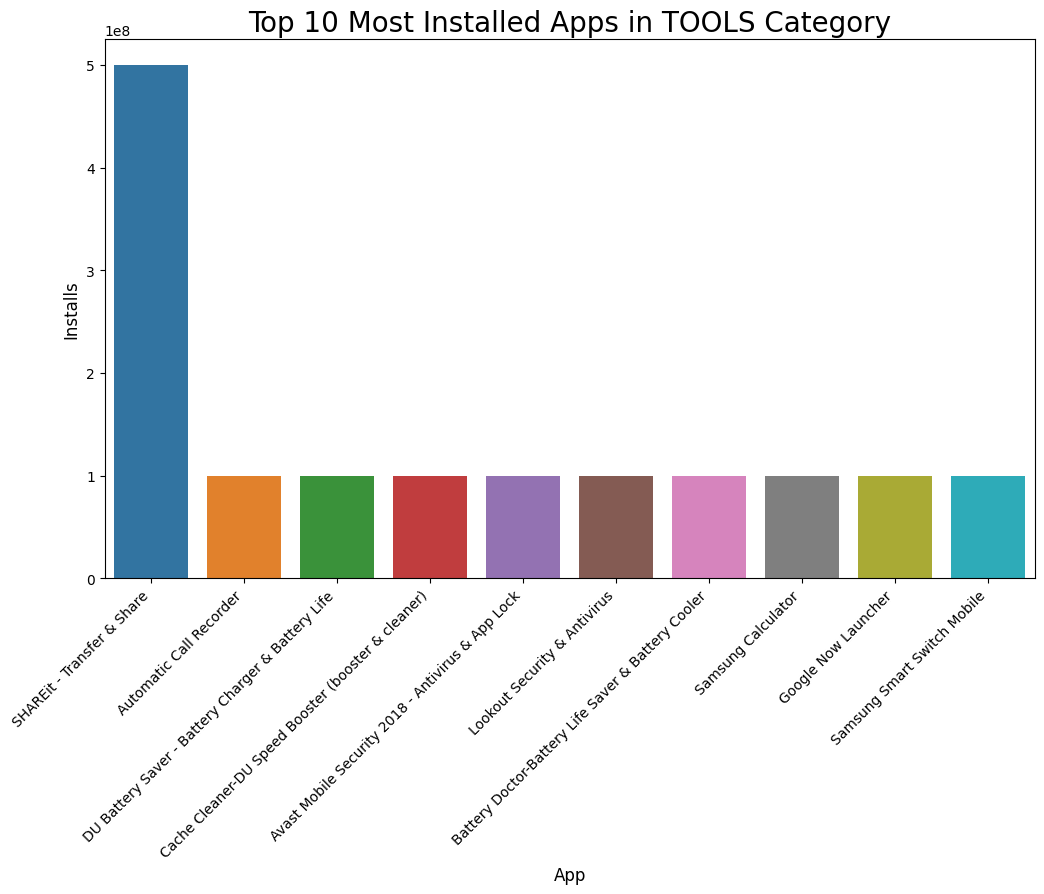

In [116]:
# Calling the function for 'Tools' Category:

top10installs_category('Tools')

<b><u>Observations</u>:</b>
* SHAREit is the most installed app in the Tools category.

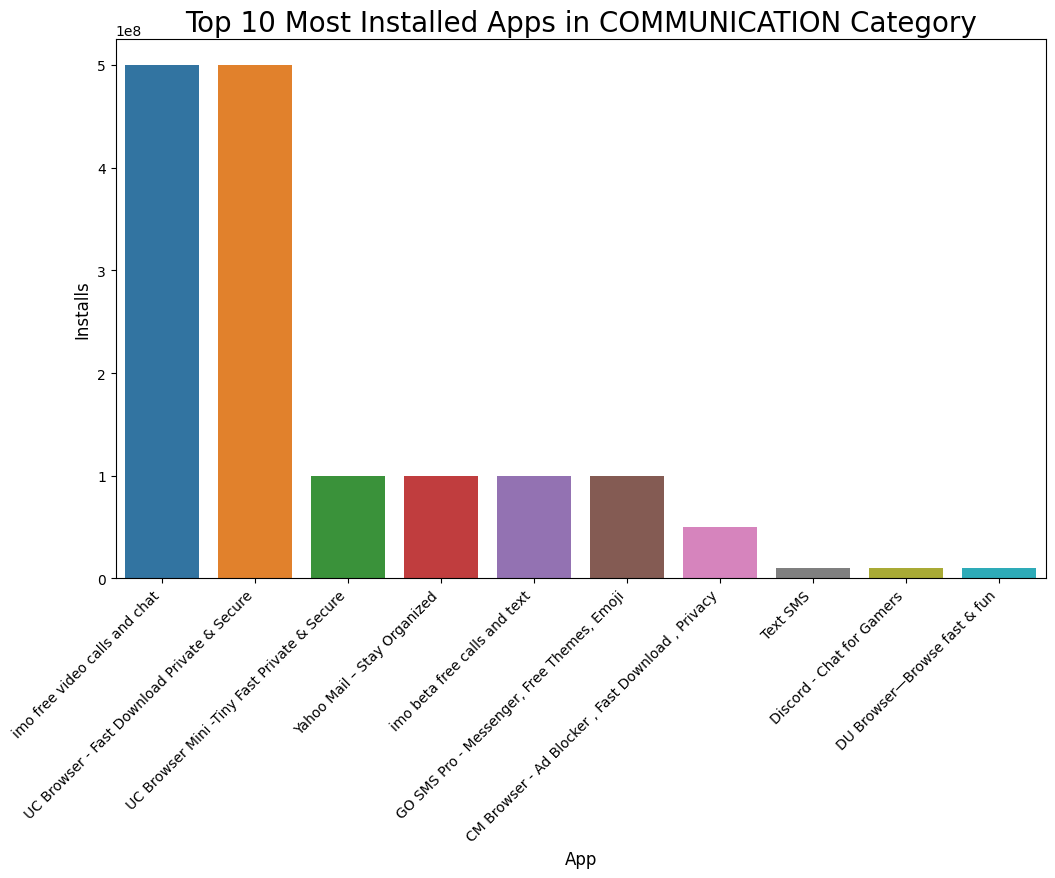

In [117]:
# Calling the function for 'Communication' Category:

top10installs_category('Communication')

<b><u>Observations</u>:</b>
* 'imo free video calls and chat' is the most installed app in the Communication category.

### <b><u>'Price' wise Analysis</u>:</b>

Finding the 10 most expensive Apps:

In [118]:
# Creating dataframe:

top10ExpApps_df = playstore_df[playstore_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)
top10ExpApps_df

,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40.0,0,Paid,399.99,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000,Paid,399.99,Everyone,Finance
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment


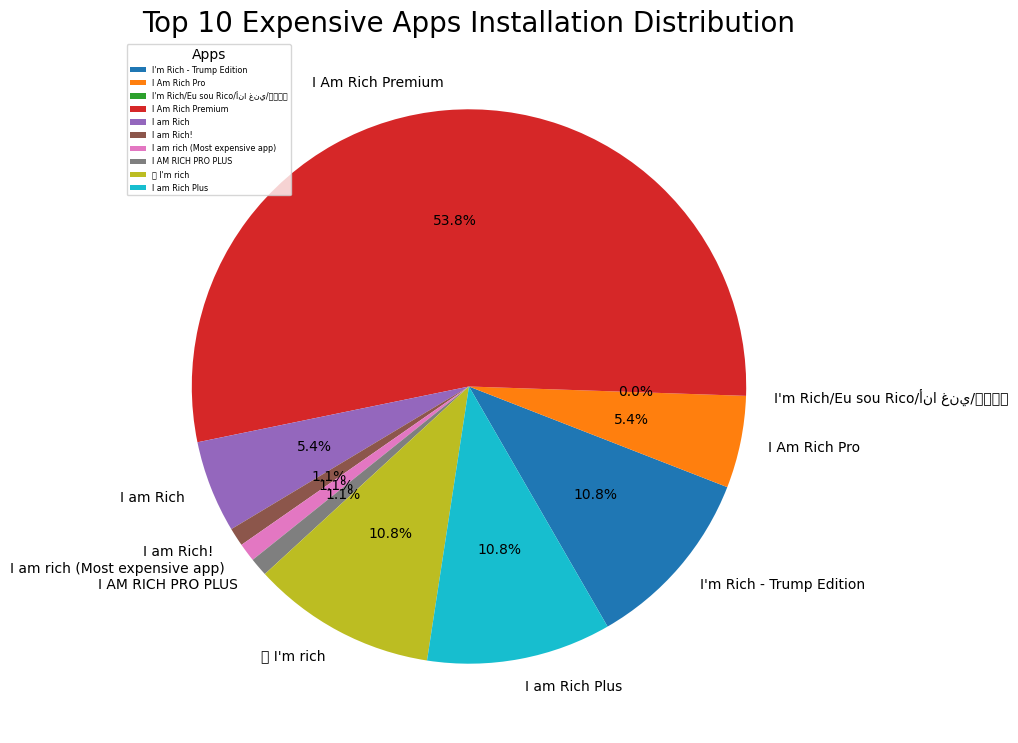

In [125]:
# Most Installed App out of Top 10 Expensive Apps:

plt.figure(figsize=(12,9))
plt.pie(top10ExpApps_df.Installs, explode=None, labels=top10ExpApps_df.App, autopct='%1.1f%%', startangle=-60)
plt.title('Top 10 Expensive Apps Installation Distribution',size = 20)
plt.legend(top10ExpApps_df.App, loc="upper left", title="Apps", fontsize = "xx-small")

<b><u>Observations</u>:</b>
* 'I Am Rich Premium' is the most installed app among the Top 10 Expensive Apps.
* Followed by "I'm rich", "I am Rich Plus" & "I'm Rich - Trump Edition".

In [126]:
# Top 10 Most Installed Free Apps:

top10FreeApps_df = playstore_df[playstore_df['Type'] == 'Free'].sort_values(by='Installs', ascending=False).head(10)
top10FreeApps_df

,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price,Content Rating,Genres
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,500000000,Free,0.0,Teen,Communication
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,500000000,Free,0.0,Everyone,Communication
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70.0,500000000,Free,0.0,Everyone,Health & Fitness
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17.0,500000000,Free,0.0,Everyone,Tools
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action


Text(0.5, 1.0, 'Top 10 Free Apps Installation Distribution')

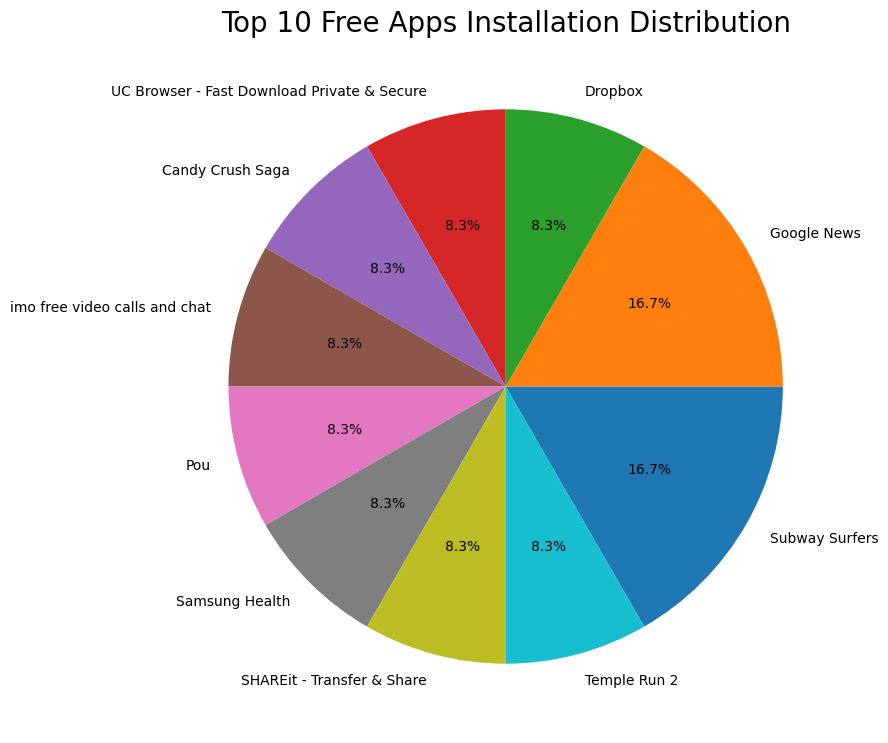

In [128]:
plt.figure(figsize=(12,9))
plt.pie(top10FreeApps_df.Installs, explode=None, labels=top10FreeApps_df.App, autopct='%1.1f%%', startangle=-60)
plt.title('Top 10 Free Apps Installation Distribution',size = 20)

<b><u>Observations</u>:</b>
* Subway Surfers & Google News are the most installed apps among the Free apps.
* Followed by DropBox, UC Browser & Candy Crush Saga.

In [131]:
# Feature Price Description:

print(f"The mean price of an App in playstore is {playstore_df['Price'].mean()}.")
print(f"The maximum price of an App in playstore is {playstore_df['Price'].max()}.")

playstore_df['Price'].describe()

The mean price of an App in playstore is 1.2259724857685008.
The maximum price of an App in playstore is 400.0.


count    8432.000000
mean        1.225972
std        18.028685
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### <b><u>'Size' wise Analysis</u>:</b>

<ipython-input-136-8ee6fb1a5294>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  size_distribution_graph = sns.kdeplot(playstore_df['Size(in MB)'], color="red", shade=True)


Text(0.5, 1.0, 'Average Size of Apps')

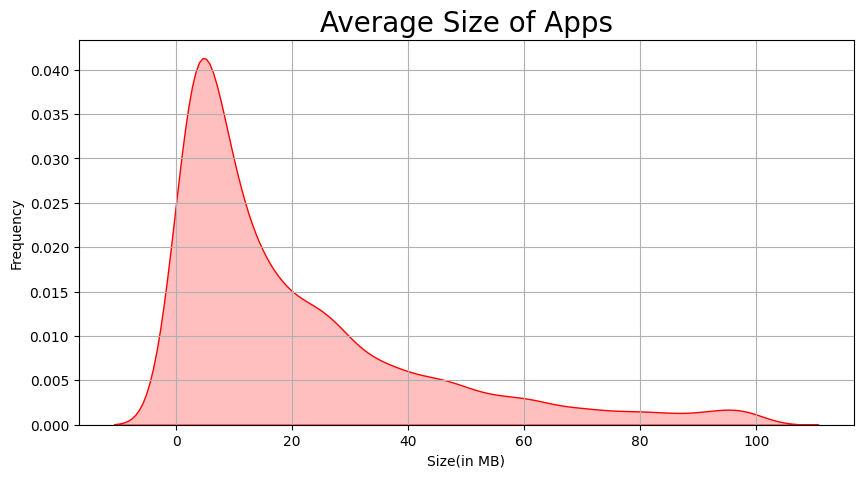

In [136]:
# Line graph for determining Size Distribution:

plt.figure(figsize=(10,5))
plt.xlabel("Size(in MB)")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(playstore_df['Size(in MB)'], color="red", shade=True)
plt.title('Average Size of Apps',size = 20)

In [137]:
print(f"The median App Size in playstore is {playstore_df['Size(in MB)'].median()}.")
print(f"The maximum App Size in playstore is {playstore_df['Size(in MB)'].max()}.")

The median App Size in playstore is 12.0.
The maximum App Size in playstore is 100.0.


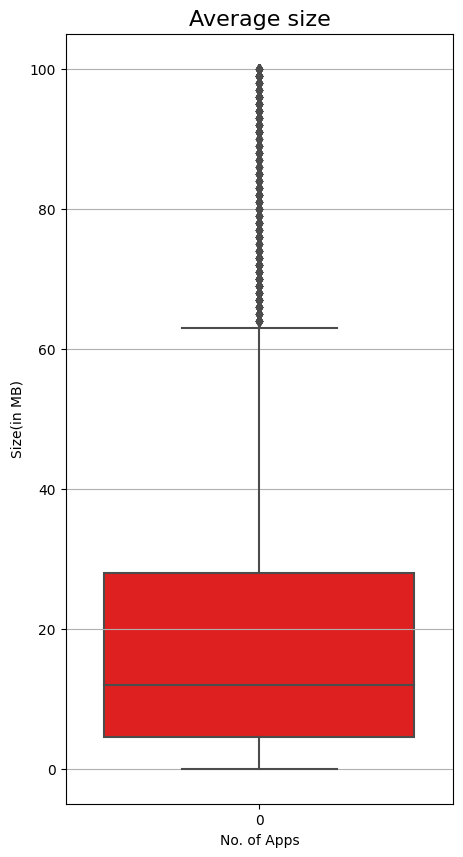

In [142]:
# BoxPlot graph for determining Size Distribution:

plt.figure(figsize=(5,10))
plt.xlabel("No. of Apps")
plt.ylabel("Size(in MB)")
plt.grid()
size_distribution_graph = sns.boxplot(playstore_df['Size(in MB)'], color="red")
plt.title('Average size', size=16);

<b><u>Observations</u>:</b>
* 25% of apps are smaller than 5 MB.
* 25% of apps have sizes between 30 MB to 63 MB.
* 50% of apps have sizes between 5 MB to 30 MB.
* Many outlier Apps have sizes all the way upto 100 MB.
* Median App Size is 12 MB.

### <b><u>'Review' wise Analysis</u>:</b>

Apps which have been reviewed the most:

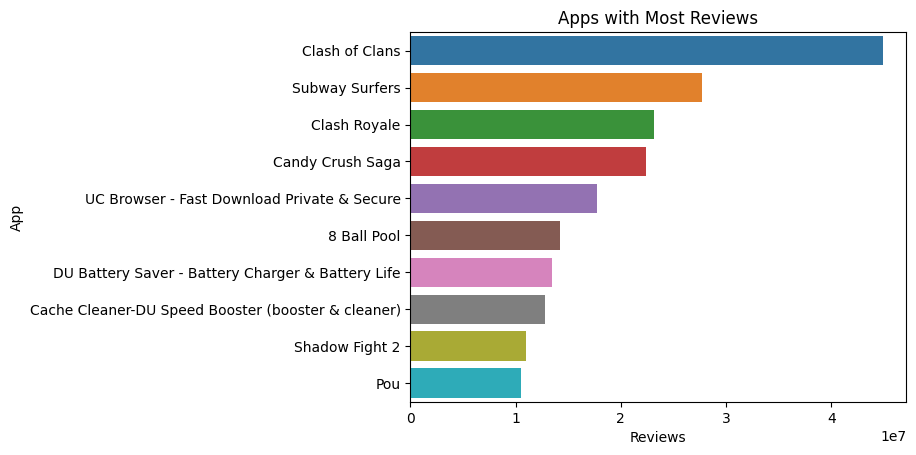

In [147]:
Apps_reviews= playstore_df.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).reset_index()
sns.barplot(y = Apps_reviews['App'], x = Apps_reviews['Reviews'])
plt.title('Apps with Most Reviews')
plt.show()

In [149]:
print("Number of Apps with more than 1M reviews",playstore_df[playstore_df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n", playstore_df[playstore_df['Reviews'] > 1000000].sort_values(by='Reviews', ascending=False).head(20)['App'].reset_index())

Number of Apps with more than 1M reviews 179

Top 20 apps with most reviews: 
     index                                                App
0    1670                                     Clash of Clans
1    1654                                     Subway Surfers
2    1660                                       Clash Royale
3    1655                                   Candy Crush Saga
4     378        UC Browser - Fast Download Private & Secure
5    1675                                        8 Ball Pool
6    8896  DU Battery Saver - Battery Charger & Battery Life
7    3239  Cache Cleaner-DU Speed Booster (booster & clea...
8    1932                                     Shadow Fight 2
9    1662                                                Pou
10   1764                                         Pokémon GO
11   1893                                            Yes day
12   3975                                            Hay Day
13   1739                           Dream League Soccer 2018
14   1

### <b><u>'Genres' wise Analysis</u>:</b>

In [155]:
# Top 10 Genres App Counts:

genres_count = playstore_df['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'}, inplace=True)
top10_genres = genres_count.head(10)
top10_genres

,Genres,count
0,Tools,731
1,Entertainment,506
2,Education,470
3,Business,376
4,Medical,368
5,Personalization,351
6,Lifestyle,333
7,Finance,299
8,Sports,291
9,Productivity,291


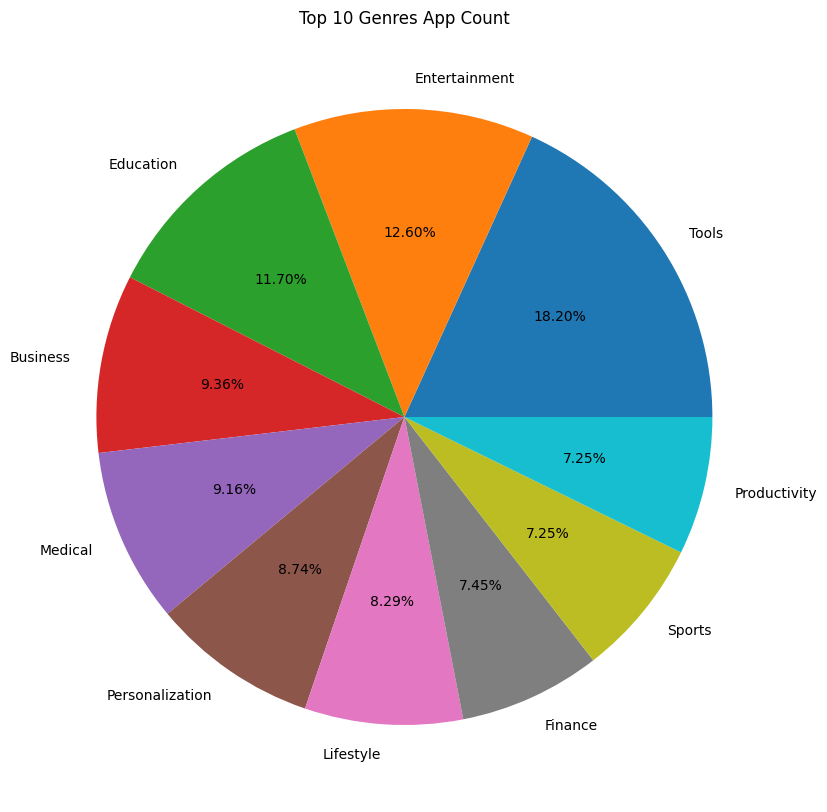

In [156]:
#Pie plot of Top 10 Genres App Count:

plt.figure(figsize =(20, 10))
plt.pie(top10_genres['count'], labels=top10_genres['Genres'], autopct='%.2f%%')
plt.title('Top 10 Genres App Count')
plt.grid()
plt.show()

<b><u>Observations</u>:</b>
* Tools Genre has the most amount of Apps.

## <b><u>Correlation Heatmap</u>:</b>

In [157]:
#Correlation
playstore_df.corr()

<ipython-input-157-72c5536a6b20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  playstore_df.corr()


,Rating,Reviews,Size(in MB),Installs,Price
Rating,1.000000,0.061297,0.045540,0.040475,-0.018721
Reviews,0.061297,1.000000,0.179321,0.597289,-0.008649
Size(in MB),0.045540,0.179321,1.000000,0.134291,-0.022441
Installs,0.040475,0.597289,0.134291,1.000000,-0.010148
Price,-0.018721,-0.008649,-0.022441,-0.010148,1.000000


<ipython-input-160-ded2919ccd6a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(playstore_df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

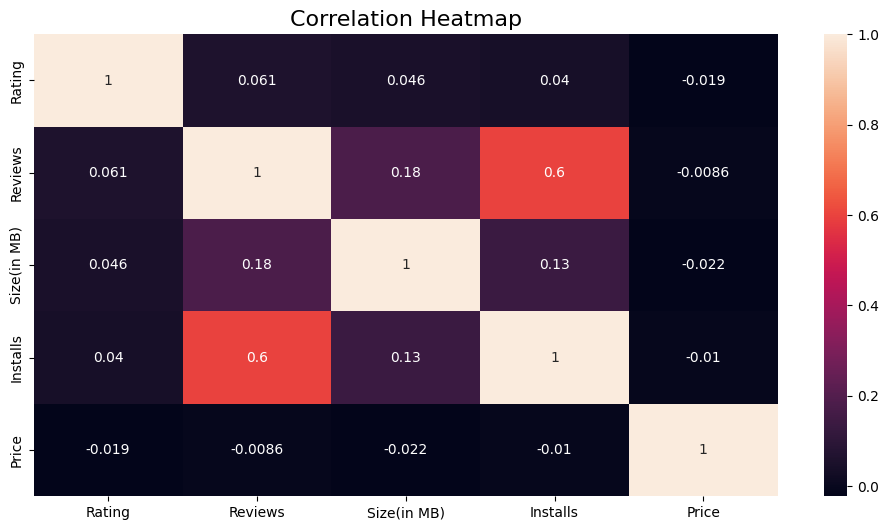

In [160]:
#Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(playstore_df.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16)

<b><u>Observations</u>:</b>
* No. of Installs & no. of Reviews are positively correlated. Higher the no. of Installs, higher the no. of Reviews.

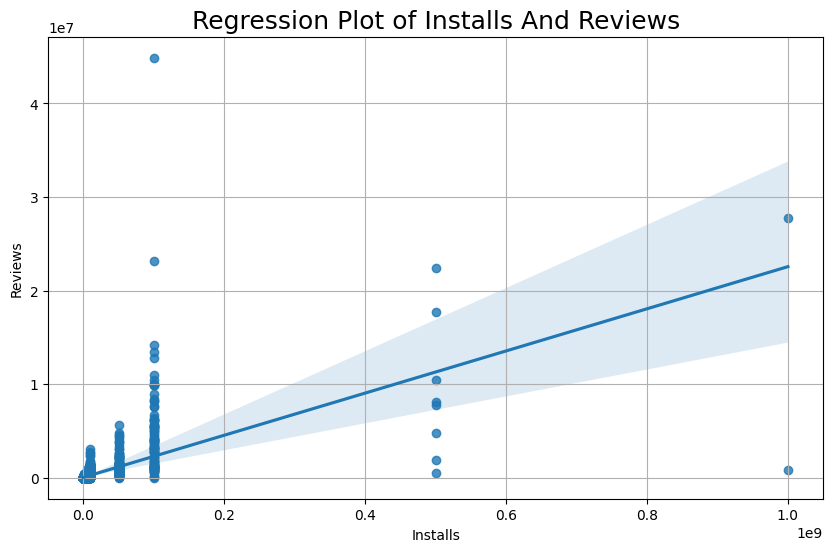

In [163]:
# Regression Plot Of Installs & Reviews:
plt.figure(figsize = (10,6))
sns.regplot(x="Installs", y="Reviews", data=playstore_df)
plt.title("Regression Plot of Installs And Reviews", fontsize=18)
plt.grid()

# <b><u>User Reviews Dataset</u>:</b>

In [164]:
#First Look Of User Reviews Data
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [165]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### <b><u>Handling missing values</u>:</b>

In [167]:
# Translated Review Null values:

user_review_df[user_review_df['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [168]:
# Dropping Rows of Null Translated Review due to other feature values also being null:

user_review_df.dropna(subset=['Translated_Review'], inplace=True)

In [169]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


# <b><u>Combining 'Play Store Dataset' & 'User Review Dataset'</u>:</b>

In [170]:
# Unique Apps in User Reviews dataset:

user_review_df['App'].nunique()

865

In [171]:
# Unique Apps in Play Store dataset:

playstore_df['App'].nunique()

8432

In [172]:
# Merging the datasets:

combined_data = pd.merge(playstore_df, user_review_df, on='App')

In [173]:
# Unique Apps in Combined dataset:

combined_data['App'].nunique()

568

In [175]:
# Null Values in Combined dataset:

combined_data.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size(in MB)               0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# <b><u>Analysis Of Combined Data</u>:</b>

### <b><u>'Sentiment' wise Analysis</u>:</b>

In [ ]:
#Sentiment count
sentiment_count = combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

In [ ]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'], labels=sentiment_count['Sentiment'], autopct='%.0f%%', explode=(0,0.05,0.05))
plt.title('Pie plot of Sentiment Count', size=15)
plt.show()

This chart interprets that most of the reviews are positive.

In [ ]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count = combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count.head()

In [ ]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiments", fontsize=15)

This graph represents sentimnet analysis of the audience based on the categories, it can be observed that all the categories have more positive reviews than negatives.

# <b><u>Conclusion</u>:</b>

Joining the dots from given datasets, we came across a lot of information. After analysis and visualization, information can be classified into beneficial for customers and beneficial for developers. We discovered the top app categories, the most popular app categories, the proportion of free and paid apps, and the average app size. This information enables customers and users to make informed download decisions.

Game category has the highest engagement

• Thus, if fast growth is expected then introducing good quality game app of suitable size can work as a charm.

Opportunities

• Various apps category like Medical, food & drinks, Health & fitness and business & finances have positive sentimental advantage from users but the population of apps is less in those categories creating opportunities for new players